<a href="https://colab.research.google.com/github/Emmaculate2020/WK-2-Data-Science-Core-IP-Exploratory-Data-Analysis-in-Python/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_05_Emmaculate_Okong'o_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis by:
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate Analysis

## 1. Defining the question

# a) Specifying the Data Analytic Question
 - How we can predict which individuals are most likely to have or use a bank account.

# b) Defining the Metric for Success

# c) Understanding the context

# d) Recording the Experimental Design

# e) Data Relevance

# 2. Reading the data

In [0]:
# Loading the Data from the source i.e. csv
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
sns.set_style()

Finance_df = pd.read_csv('http://bit.ly/FinancialDataset')

# 3. Checking the Data

In [526]:
# Determining the no. of records in our dataset
Finance_df.shape

(23524, 13)

In [527]:
# Previewing the top of our dataset
Finance_df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [528]:
# Previewing the bottom of our dataset
Finance_df.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [529]:
# Checking whether each column has an appropriate datatype
Finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [530]:
Finance_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# 4. External Data Source Validation

 #  - Validation

# 5. Tidying the Dataset

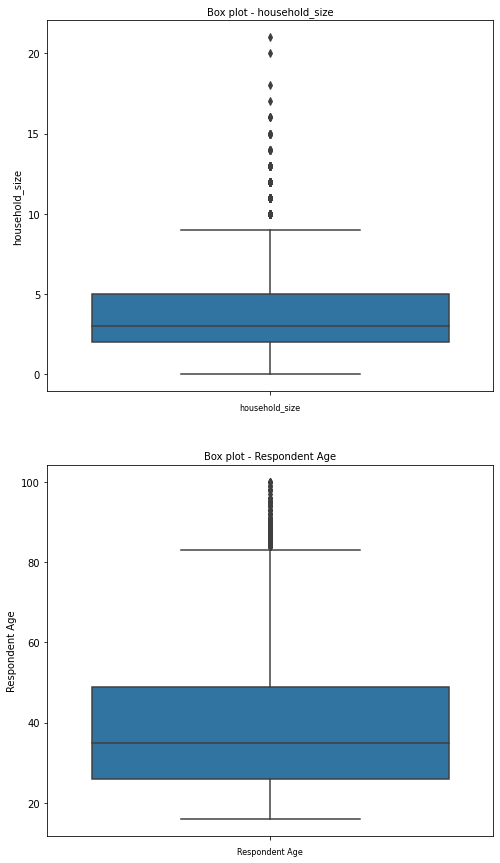

In [531]:
# Checking for Outliers
#
col_names = ['household_size','Respondent Age']
fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Finance_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
  
plt.show()

In [532]:
# Checking for Anomalies
# Checking for outliers using interquantile range

sorted_df = Finance_df.sort_values(['household_size','Respondent Age'],ascending = True)
sorted_df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
20836,Tanzania,2017,uniqueid_6034,No,Rural,No,0.0,16.0,Male,Other relative,Divorced/Seperated,Secondary education,No Income
19481,Tanzania,2017,uniqueid_4679,No,Rural,No,0.0,17.0,Female,Other relative,Divorced/Seperated,Primary education,Remittance Dependent
16132,Tanzania,2017,uniqueid_1330,No,Rural,No,0.0,18.0,Female,Other relative,Divorced/Seperated,Secondary education,Remittance Dependent
21168,Tanzania,2017,uniqueid_6366,No,Rural,No,0.0,18.0,Male,Head of Household,Divorced/Seperated,Secondary education,No Income
16006,Tanzania,2017,uniqueid_1204,No,Rural,Yes,0.0,22.0,Female,Head of Household,Divorced/Seperated,Tertiary education,Remittance Dependent


In [533]:
# Dropping the null values first

sorted_df.dropna(subset=['Respondent Age'])
#sorted_df['household_size'].fillna(0)

quantile1,quantile3 = np.percentile(sorted_df['Respondent Age'],[25,75])

print(quantile1,quantile3)
#iqr_value = quantile3 - quantile1



nan nan


In [534]:

# Identifying the Missing Data
#
Finance_df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [535]:
# Identifying the Missing Data
#
Finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [536]:
Finance_df.shape

(23524, 13)

In [0]:
# Dealing with the Missing Data
#
  #Financial_df = Financial_df.dropna().head()

In [538]:
# Dropping unnecessary columns

Finance_df.drop(['uniqueid','The relathip with head'], axis = 1)


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


# 6. Exploratory Analysis


# a) Univariate Analysis

In [0]:
# Changing some column values to numerical for easy analysis

Finance_df['gender_of_respondent'].replace({'Female':0,'Male':1},inplace=True)
Finance_df['Has a Bank account'].replace({'No':0,'Yes':1},inplace=True)
Finance_df['Cell Phone Access'].replace({'No':0,'Yes':1},inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


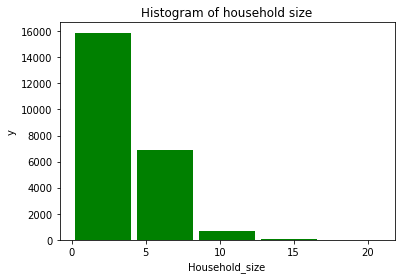

In [540]:
# Ploting the univariate summaries and recording our observations
#

x = Finance_df['household_size']

plt.hist(x, bins = 5, histtype='bar', rwidth=0.9, color = 'green')

plt.xlabel('Household_size')
plt.ylabel('y')
plt.title('Histogram of household size') 
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


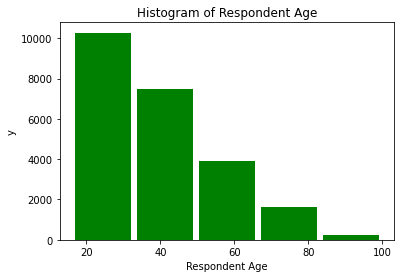

In [541]:
# More univariate summaries

x = Finance_df['Respondent Age']

plt.hist(x, bins = 5, histtype='bar', rwidth=0.9, color = 'green')

plt.xlabel('Respondent Age')
plt.ylabel('y')
plt.title('Histogram of Respondent Age') 
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


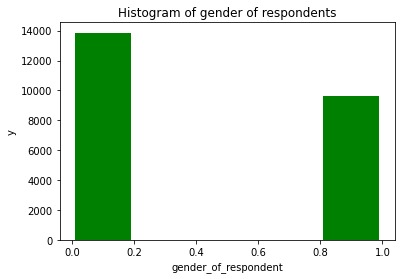

In [542]:
# More univariate summaries

x = Finance_df['gender_of_respondent']

plt.hist(x, bins = 5, histtype='bar', rwidth=0.9, color = 'green')

plt.xlabel('gender_of_respondent')
plt.ylabel('y')
plt.title('Histogram of gender of respondents') 
plt.show()

# b) Bivariate Analysis

In [626]:
# Correlation
# To find out if there is a correlation between household size and respondent age

# Calculating the pearson coefficient
pearson_coeff = Finance_df["household_size"].corr(Finance_df["Respondent Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = Finance_df["household_size"].corr(Financial_df["Respondent Age"]) 
print(coeff)

# This means that weight and displacement are negatively and weakly correlated.

-0.11954415493819366
-0.11963721676089611


In [624]:
# Previewing the dataset used in Bivariate Analysis as used in Factor Analysis and LDA
new_df.head()

,Has a Bank account,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.0
1,0.0,0.0,5.0,70.0,0.0
2,1.0,1.0,5.0,26.0,1.0
3,0.0,1.0,5.0,34.0,0.0
4,0.0,0.0,8.0,26.0,1.0


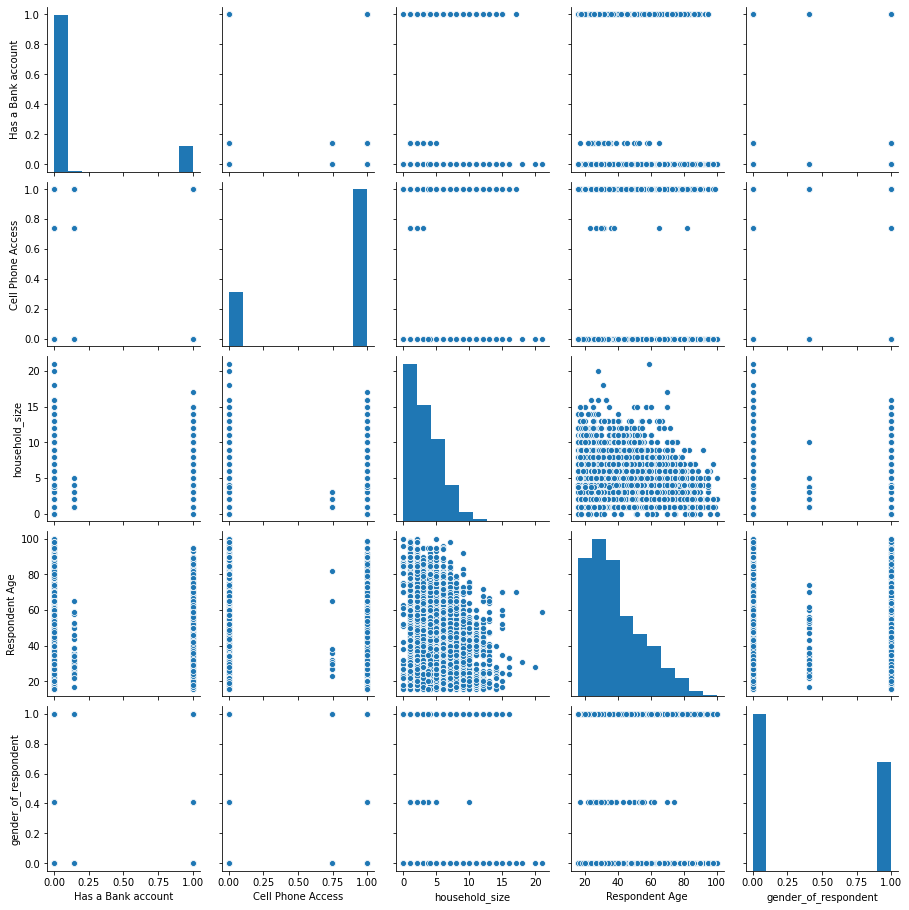

In [620]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(new_df)
plt.show()

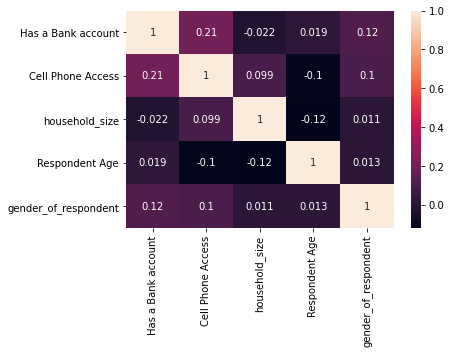

In [622]:

sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [623]:
new_df.columns

Index(['Has a Bank account', 'Cell Phone Access', 'household_size',
       'Respondent Age', 'gender_of_respondent'],
      dtype='object')

# C) Multivariate Analysis

#1. Principle Component Analysis

In [0]:
# Preprocessing
# 
X = Finance_df.drop(['country','year','The relathip with head','marital_status','Level of Educuation','Type of Job','uniqueid','Type of Location'],axis=1)
y = Finance_df['year']

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Finance_df['Type of Location'].replace({'Rural':1,'Urban':2, ' ': 0},inplace=True)

In [0]:
# Normalization
# 

Finance_df['Has a Bank account'].fillna(Finance_df['Has a Bank account'].mean(), inplace=True)
Finance_df['Cell Phone Access'].fillna(Finance_df['Cell Phone Access'].mean(), inplace=True)
Finance_df['household_size'].fillna(Finance_df['household_size'].mean(), inplace=True)
Finance_df['Respondent Age'].fillna(Finance_df['Respondent Age'].mean(), inplace=True)
Finance_df['gender_of_respondent'].fillna(Finance_df['gender_of_respondent'].mean(), inplace=True)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [565]:
Finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           0
Cell Phone Access          0
household_size             0
Respondent Age             0
gender_of_respondent       0
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Applying PCA
# 

Finance_df["Type of Location"] = Finance_df["Type of Location"].fillna(0)
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [567]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26359935, 0.22702451, 0.18420223, 0.17459672, 0.15057718])

In [0]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 

Finance_df['Has a Bank account'].fillna(Finance_df['Has a Bank account'].mean(), inplace=True)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [570]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# This is resulting in 93.33% accuracy because there were so many null values thus our data was not that ideal for our analysis.

[[981 486 293   0]
 [421 786 114   0]
 [714 530 379   0]
 [  0   0   1   0]]
Accuracy 0.45611052072263547


#2. Factor Analysis

In [577]:
pip install factor-analyzer

# We have installed FactorAnalyzer to easen our analysis

In [578]:
# Previewing our dataset
# 
Finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,1.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,1.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,2.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,1.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,2.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [595]:
# Dropping unnecessary columns
#
new_df = Finance_df.drop(['country','year','The relathip with head','marital_status','Level of Educuation','Type of Job','uniqueid','Type of Location'],axis=1)
new_df

,Has a Bank account,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.0
1,0.0,0.0,5.0,70.0,0.0
2,1.0,1.0,5.0,26.0,1.0
3,0.0,1.0,5.0,34.0,0.0
4,0.0,0.0,8.0,26.0,1.0
...,...,...,...,...,...
23519,0.0,1.0,4.0,48.0,0.0
23520,0.0,1.0,2.0,27.0,0.0
23521,0.0,1.0,5.0,27.0,0.0
23522,0.0,1.0,7.0,30.0,0.0


In [580]:
# Checking for null values
Finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           0
Cell Phone Access          0
household_size             0
Respondent Age             0
gender_of_respondent       0
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [600]:
# Adequacy Test 
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(new_df)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(2394.6432664370795, 0.0)

In [0]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(new_df)


In [602]:
# Creating a factor analyzer variable and performing factor analysis
# 
from factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(new_df, 2)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


array([1.31989099, 1.13947021, 0.91824265, 0.87357982, 0.74881632])

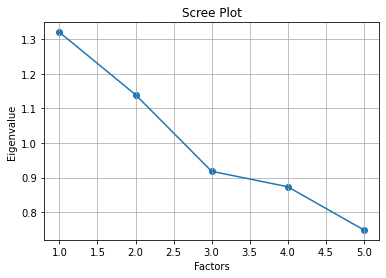

In [603]:
# Creating a scree plot method using matplotlib
#
plt.scatter(range(1,new_df.shape[1]+1),ev)
plt.plot(range(1,new_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#3. Discriminant Analysis

In [614]:
#Previewing my dataset
new_df.head()

,Has a Bank account,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.0
1,0.0,0.0,5.0,70.0,0.0
2,1.0,1.0,5.0,26.0,1.0
3,0.0,1.0,5.0,34.0,0.0
4,0.0,0.0,8.0,26.0,1.0


In [0]:
# Dividing the dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. 
#
X = new_df.iloc[:, 0:4].values
y = new_df.iloc[:, 4].values

In [0]:
# Dividing data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# We perform Feature scaling by executing the below code

# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [0]:
# Evaluating the Performance
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# Implementing the solution

- The dataset did not have enough information to enable our analysis for the implementtion of the main objective.

# Challenging the solution

- With enough variables on the dataset we can be able to find how we can predict which individuals are most likely to have or use a bank account.

# Follow up questions



a) Did we have the right data?
- Yes, though our dataset did not have enough information to enable us answer the research question.

b) Do we need other data to answer out question?
- Yes

c) Did we have the right question?
- Yes